In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("D:\\DATA_science\\Data_sets\\Multilinear_Reg\\cars.csv")

In [3]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation matrix

In [7]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


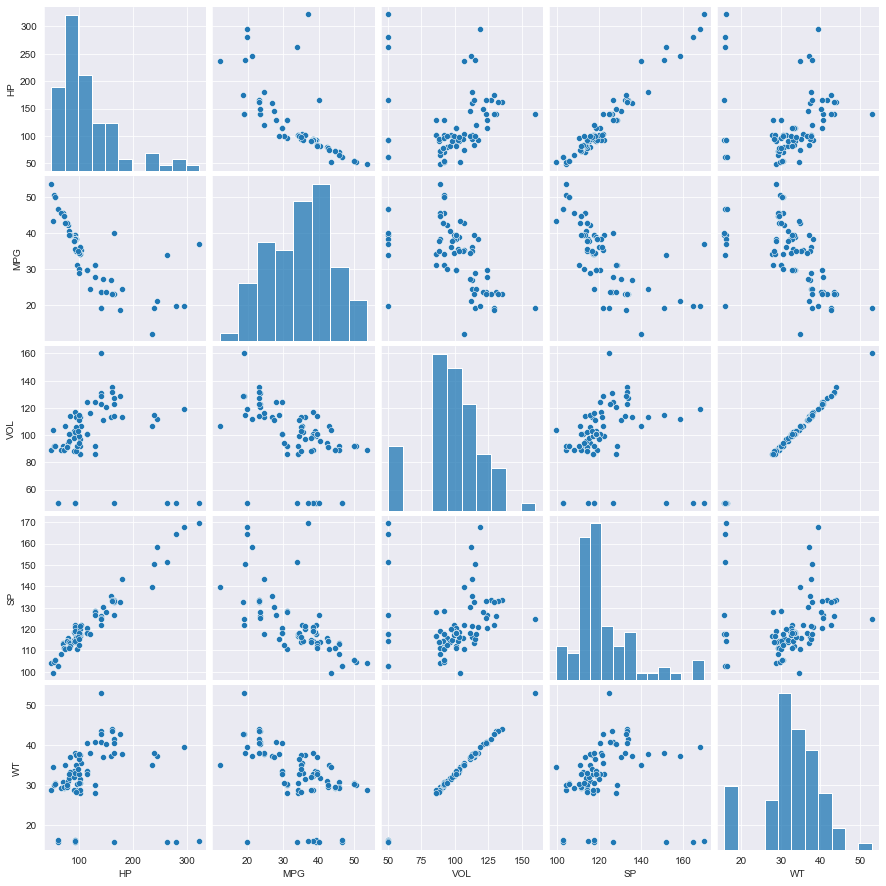

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [11]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~HP+VOL+SP+WT',data=data).fit()
model

In [13]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [15]:
(model.tvalues,'\n',model.pvalues)

(Intercept    2.058841
 HP          -5.238735
 VOL         -0.590970
 SP           2.499880
 WT           0.236541
 dtype: float64,
 '\n',
 Intercept    0.042936
 HP           0.000001
 VOL          0.556294
 SP           0.014579
 WT           0.813649
 dtype: float64)

In [20]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

In [28]:
ml_v=smf.ols('MPG~VOL',data=data).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [27]:
ml_w=smf.ols('MPG~WT',data=data).fit()
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [26]:
ml_vw=smf.ols('MPG~VOL+WT',data=data).fit()
print(ml_vw.tvalues,'\n',ml_vw.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


In [34]:
rsq_hp=smf.ols('HP~VOL+WT+SP',data=data).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_sp=smf.ols('SP~VOL+WT+HP',data=data).fit().rsquared
vif_sp=1/(1-rsq_sp)

rsq_vol=smf.ols('VOL~HP+WT+SP',data=data).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_wt=smf.ols('WT~VOL+HP+SP',data=data).fit().rsquared
vif_wt=1/(1-rsq_wt)


In [39]:
d1={'variables':['HP','SP','VOL','WT'],'vif':[vif_hp,vif_sp,vif_vol,vif_wt]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,vif
0,HP,19.926589
1,SP,20.007639
2,VOL,638.806084
3,WT,639.533818


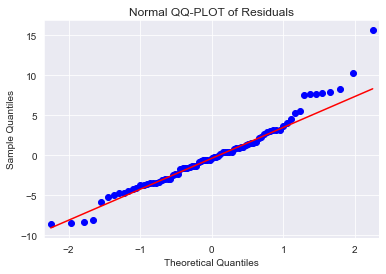

In [44]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title('Normal QQ-PLOT of Residuals')
plt.show()

In [45]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

In [46]:
def get_standardized_values (vals):
    return(vals - vals.mean())/vals.std()

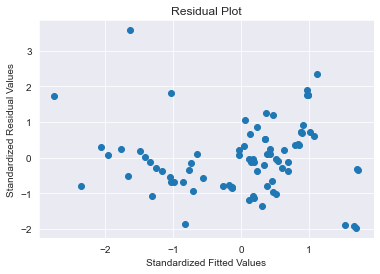

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

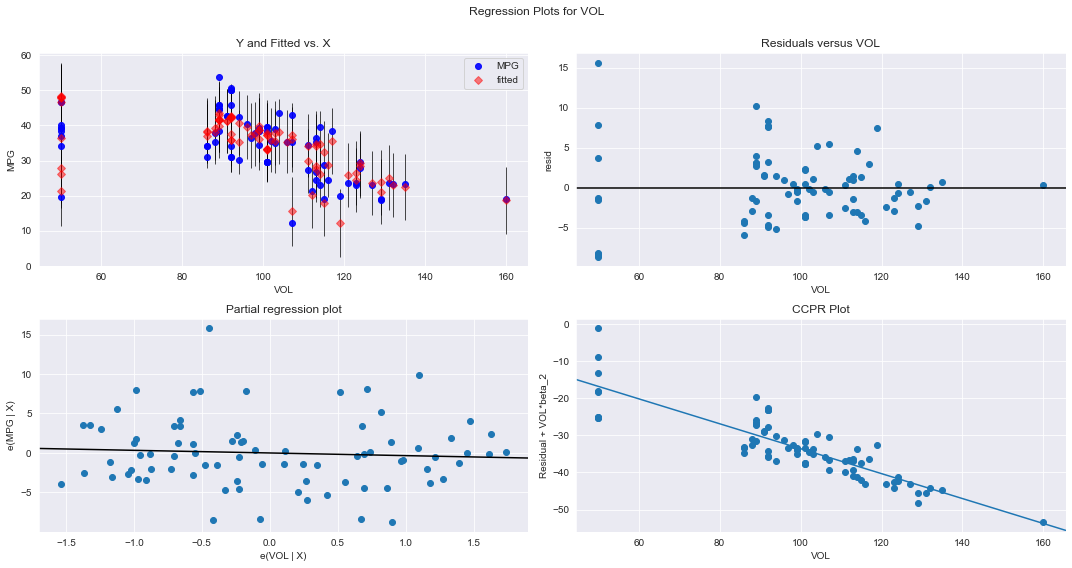

In [50]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

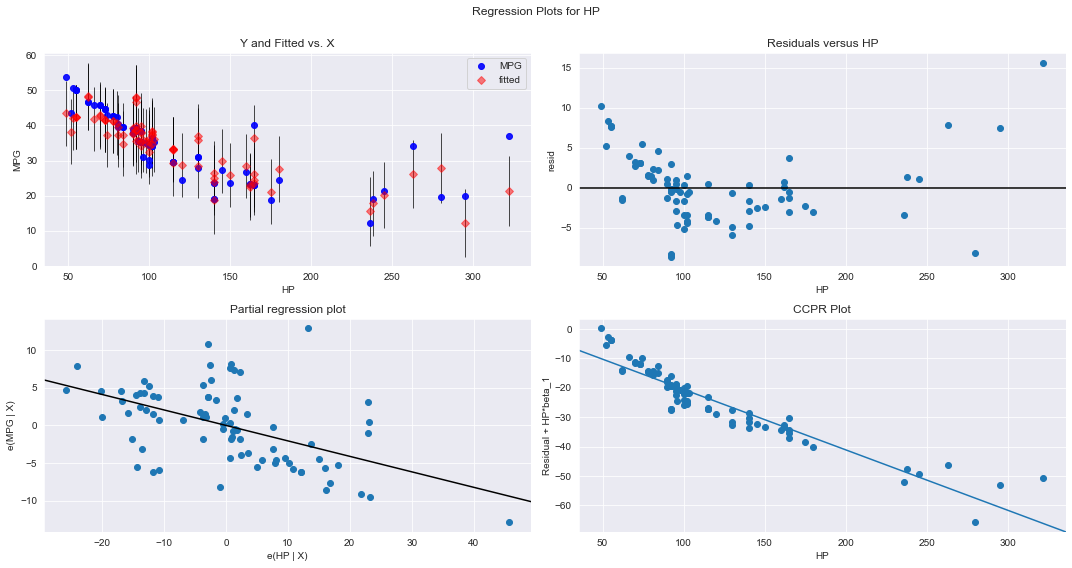

In [51]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

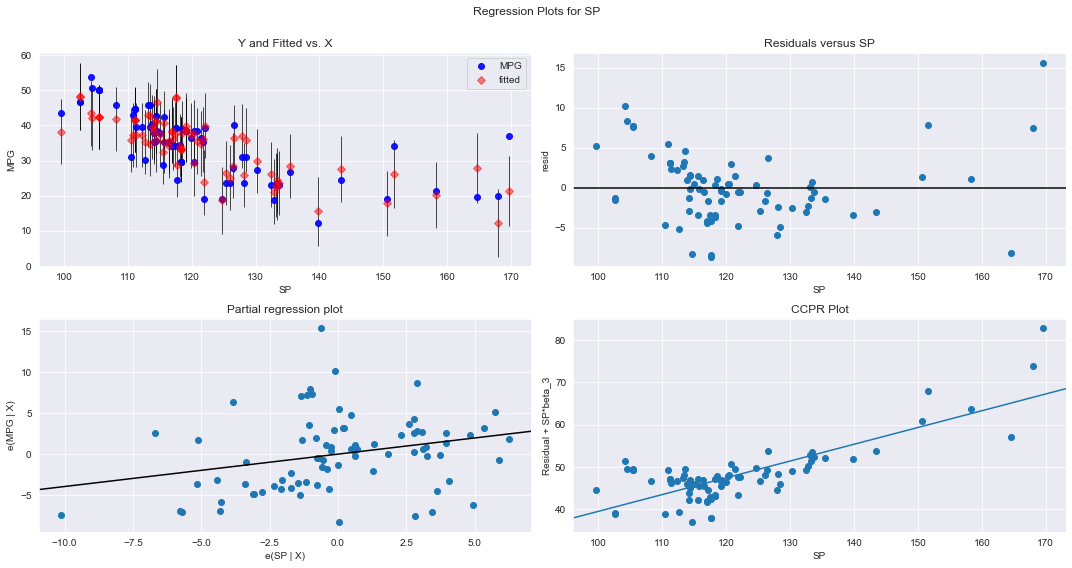

In [53]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

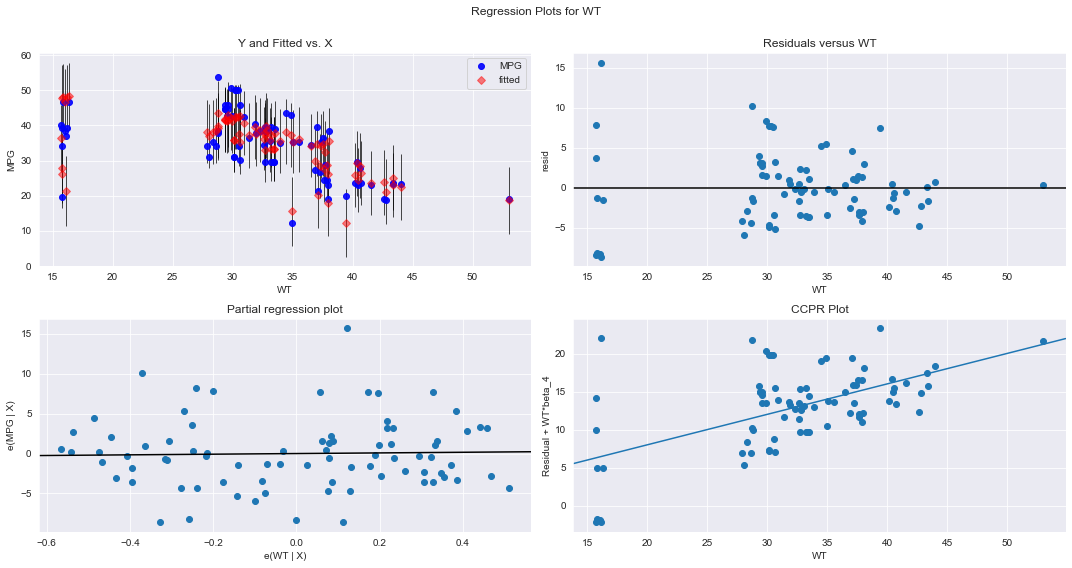

In [54]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

In [58]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance
(c, _)

(array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
        2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
        4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
        3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
        1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
        1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
        1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
        3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
        4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
        3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
        2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
        1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
        1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
        1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.466954

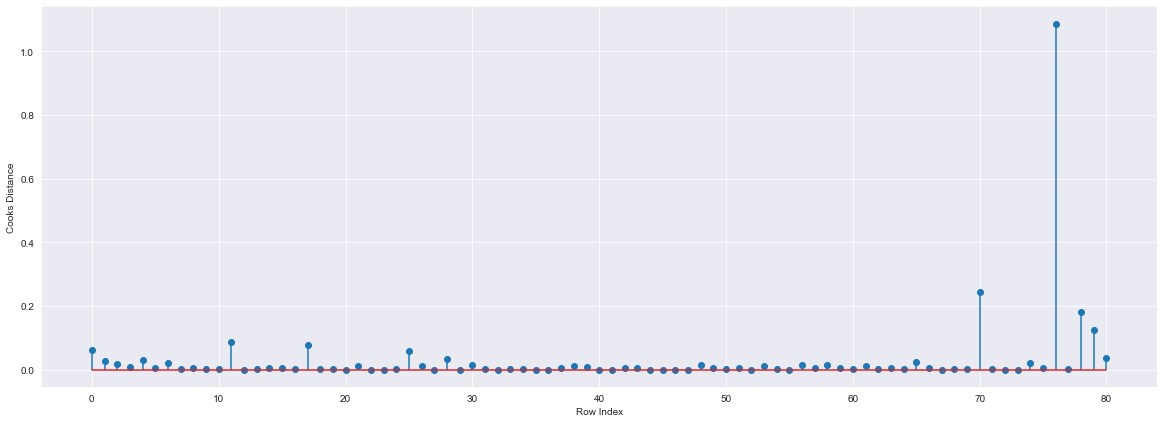

In [61]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [62]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179994)

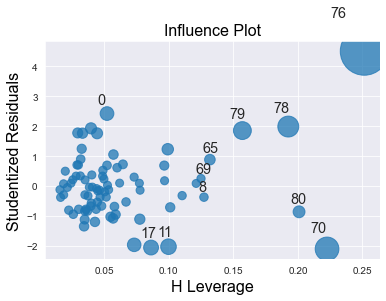

In [63]:
influence_plot(model)
plt.show()